# Date preparation and importing basic modules 

In [1]:
# data read-in
# use pandas dataframe or series as data structure
import numpy as np
import pandas as pd
raw = pd.read_csv('NewTraining.csv')
X = raw.ix[:,2:]
X.index = list(raw['id'])
y = raw['y']
y.index = X.index
testX = pd.read_csv('NewTesting.csv')
testX.index = list(testX.pop('id'))

In [2]:
X[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
2,0.766127,45,2,0.802982,9.120000e+03,13,0,6,0,2,NaN,CallOfDuty,NaN
1,0.957151,40,0,0.121876,2.600000e+03,4,0,0,0,1,NaN,BattleField,Strawberry
0,0.658180,38,1,0.085113,3.042000e+03,2,1,0,0,0,NaN,CallOfDuty,Strawberry
3,0.233810,30,0,0.036050,3.300000e+03,5,0,0,0,0,NaN,Fallout,NaN
4,0.907239,49,1,0.024926,inf,7,0,1,0,0,NaN,NaN,Chocolate
5,0.213179,74,0,0.375607,3.500000e+03,3,0,1,0,1,NaN,Fallout,NaN
6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0,NaN,NaN,Vanilla
7,0.754464,39,0,0.209940,3.500000e+03,8,0,0,0,0,NaN,BattleField,Strawberry
8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,NaN,NaN,Chocolate
9,0.189169,57,0,0.606291,2.368400e+04,9,0,4,0,2,NaN,NaN,Vanilla


In [3]:
y[0:10]

2    1
1    0
0    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: y, dtype: int64

In [4]:
testX[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,CallOfDuty,Chocolate
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,CallOfDuty,Vanilla
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,CallOfDuty,NaN
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,NaN,Strawberry
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,NaN,Fallout,Chocolate
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,BattleField,Vanilla
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,BattleField,NaN
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,Fallout,Chocolate
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,CallOfDuty,Strawberry
9,0.230381,47,0,2737.000000,NaN,9,0,3,0,0,NaN,NaN,Strawberry


In [82]:
import bear.bear as br
reload(br)

<module 'bear.bear' from 'bear\bear.py'>

# Initial analysis

,Percentage
x11,1.000
x13,0.248
x12,0.246
x5,0.196
x10,0.026


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11
count,10000.000000,10000.000000,10000.000000,10000.000000,8044.000000,10000.00000,10000.000000,10000.000000,10000.000000,9739.000000,0
mean,2.997234,52.203000,0.420800,335.212751,6426.326206,8.40010,0.269800,1.004100,0.244500,0.756854,NaN
std,86.790739,14.957372,4.203653,1140.583585,6082.077916,5.10159,4.181502,1.111668,4.165292,1.129445,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,NaN
25%,0.030019,41.000000,0.000000,0.177689,3376.500000,5.00000,0.000000,0.000000,0.000000,0.000000,NaN
50%,0.161201,52.000000,0.000000,0.367272,5300.000000,8.00000,0.000000,1.000000,0.000000,0.000000,NaN
75%,0.584905,63.000000,0.000000,0.872781,8179.500000,11.00000,0.000000,2.000000,0.000000,1.000000,NaN
max,4212.000000,105.000000,98.000000,33448.000000,287662.000000,51.00000,98.000000,17.000000,98.000000,20.000000,NaN


,Counts
0,9316
1,684


,corr,p-value
x3,0.133654,4.376088e-41
x7,0.129557,1.088689e-38
x2,-0.115371,5.560632e-31
x9,0.114682,1.248707e-30
x10,0.047405,2.864703e-06
x5,-0.044331,6.970782e-05
x6,-0.018922,5.847007e-02
x4,-0.013980,1.621586e-01
x1,-0.007135,4.755941e-01
x8,0.006128,5.400534e-01


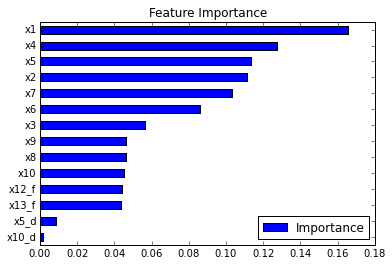

,Percentage
x11,1.000
x12,0.257
x13,0.249
x5,0.198
x10,0.026


[]


['x11']


[]


[]


[]


[]


[]


In [29]:
# this function will give initial analyses on the data.
# y and testing data are optional. Rows_to_scan and sample_size can be used when dataset is very large.
# sample_size determines the size of sample used to do simple random forest to give a benchmark
# rows_to_scan controls the number of observations to check to do other initial analyses
# cate_cap determines the max number of categories to display in the analysis.
# random_state controls the sampling process
# problem_type is 'infer' in default, meaning that it will automatically decide the problem type

%matplotlib inline
br.get_initial_analysis(X, y, testX, rows_to_scan=10000, sample_size=5000, random_state=42, cate_cap=10)

# Functions for more initial analyses

In [31]:
# these functions will return a list of column names of numeric values or categorical ones
print br.get_categorical(X)
print br.get_numeric(X)

['x12', 'x13']
['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']


In [32]:
# this function will return a list of columns that have missing values.
# rows and columns to check can be selected at users' own
# rows_to_scan can be float(portion of all the rows), int or 'all'
print br.get_columns_with_nulls(X, columns_to_scan=['x1', 'x5', 'x11', 'x12'], rows_to_scan=0.6)
print br.get_columns_with_nulls(X, ['x5', 'x12'], rows_to_scan=5)
print br.get_columns_with_nulls(X, columns_to_scan='all', rows_to_scan='all')

['x5', 'x11', 'x12']
['x12']
['x5', 'x10', 'x11', 'x12', 'x13']


In [33]:
# this function will return a list of columns that have no available values.
print br.get_columns_with_all_nulls(X, ['x1', 'x5', 'x11', 'x12'], rows_to_scan=0.6)
print br.get_columns_with_all_nulls(X, ['x5', 'x12'], rows_to_scan=200)
print br.get_columns_with_all_nulls(X)
print
# this function will return a list of columns that have at least one available value
print br.get_columns_not_all_nulls(X, ['x5', 'x12'])
print br.get_columns_not_all_nulls(X)

['x11']
[]
['x11']

['x12', 'x5']
['x1', 'x2', 'x8', 'x9', 'x10', 'x3', 'x12', 'x13', 'x6', 'x7', 'x4', 'x5']


In [34]:
# this function will return a dictionary of percentage of missing values of columns 
# only_nulls can determine whether the columns having no missing values will be added into the dictionary
# deci controls the number of decimals
print br.get_percentage_of_nulls(X, ['x1', 'x2', 'x11', 'x12'], rows_to_scan=1.1, only_nulls=False)
print br.get_percentage_of_nulls(X)
print br.get_percentage_of_nulls(X, ['x5', 'x10', 'x11', 'x12'], rows_to_scan=0.3, deci=3)
print br.get_percentage_of_nulls(X, 'x1')
print br.get_percentage_of_nulls(X, 'x5', only_nulls=False, rows_to_scan=5)

{'x2': 0.0, 'x11': 1.0, 'x12': 0.25060000000000004, 'x1': 0.0}
{'x10': 0.026209999999999956, 'x11': 1.0, 'x12': 0.25060000000000004, 'x13': 0.25034000000000001, 'x5': 0.19811999999999996}
{'x10': 0.027, 'x11': 1.0, 'x12': 0.253, 'x5': 0.2}
{}
{'x5': 0.0}


In [35]:
# 'pd' version of this function will return a pandas dataframe sorted by the percentage of missing values
br.get_percentage_of_nulls_pd(X, br.get_categorical(X)+['x11', 'x5'], deci=3)

,Percentage
x11,1.000
x12,0.251
x13,0.250
x5,0.198


In [36]:
# this function will return a dictionary showing the value counts of different categories in different columns
br.get_value_counts(X, columns=['x1', 'x12', 'x13', 'x11'], cate_cap=20)

{'x1': 'There are more than 20 categories. Please check this column.',
 'x11': {'NaN': 100000},
 'x12': {'BattleField': 24930,
  'CallOfDuty': 25056,
  'Fallout': 24954,
  'NaN': 25060},
 'x13': {'Chocolate': 25079,
  'NaN': 25034,
  'Strawberry': 25021,
  'Vanilla': 24866}}

In [39]:
# 'pd' version of this function will retuan a pandas dataframe instead
# if there are more than cate_cap categories, then 'Too many categories' will be displayed
br.get_value_counts_pd(X, columns=['x1', 'x12', 'x13', 'x11'])

counts
column category                        
x1     x1           Too many categories
x11    NaN                       100000
x12    NaN                        25060
       CallOfDuty                 25056
       Fallout                    24954
       BattleField                24930
x13    Chocolate                  25079
       NaN                        25034
       Strawberry                 25021
       Vanilla                    24866

#Classes that can be inserted into pipelines of scikit-learn

In [40]:
# this class will remove columns with all missing values
rem = br.RemoveAllNull(columns_to_check='all')
rem.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x12,x13
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,CallOfDuty,Chocolate
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,CallOfDuty,Vanilla
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,CallOfDuty,NaN
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,Strawberry
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,Fallout,Chocolate
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,BattleField,Vanilla
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,BattleField,NaN
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,Fallout,Chocolate
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,CallOfDuty,Strawberry
9,0.230381,47,0,2737.000000,NaN,9,0,3,0,0,NaN,Strawberry


In [41]:
# this class can convert categorical columns using different methods like factorize, group_mean, value_counts, dummy
# categorical_columns can be a list of column names; default is 'all', which means converting all the categorical columns
catdummy = br.ConvertCategorical(categorical_columns='all', method='dummy', rows_to_scan='all')
catdummy.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12_CallOfDuty,x12_BattleField,x12_Fallout,x12_nan,x13_nan,x13_Strawberry,x13_Chocolate,x13_Vanilla
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,1,0,0,0,0,0,1,0
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,1,0,0,0,0,0,0,1
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,1,0,0,0,1,0,0,0
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,0,0,0,1,0,1,0,0
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,NaN,0,0,1,0,0,0,1,0
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,0,1,0,0,0,0,0,1
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,0,1,0,0,1,0,0,0
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,0,0,1,0,0,0,1,0
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,1,0,0,0,0,1,0,0
9,0.230381,47,0,2737.000000,NaN,9,0,3,0,0,NaN,0,0,0,1,0,1,0,0


In [42]:
# original columns, and categorical columns that are not selected will be discarded
catdummy2 = br.ConvertCategorical(['x12'], method='factorize', rows_to_scan=0.9)
catdummy2.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12_f
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,0
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,0
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,0
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,3
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,NaN,2
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,1
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,1
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,2
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,0
9,0.230381,47,0,2737.000000,NaN,9,0,3,0,0,NaN,3


In [43]:
# when method is not 'dummy', the new columns name will be 'name_f'
catdummy2 = br.ConvertCategorical(['x12'], method='group_means', rows_to_scan=0.2)
catdummy2.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12_f
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,0.059420
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,0.059420
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,0.059420
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,0.071500
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,NaN,0.067432
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,0.058554
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,0.058554
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,0.067432
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,0.059420
9,0.230381,47,0,2737.000000,NaN,9,0,3,0,0,NaN,0.071500


In [44]:
# this class will fix the value of outliers
# criteria_coef is a tuple determines the method and coefficient. (If 'all', then do nothing.) others can be ('sd', 2)
# columns_to_fix is 'all' in default.  If 'auto', then only fix numeric columns
# method determines which bound should be fixed ('upper' 'lower' 'both')
# fill_with determines the fixing method. (can be 'missing' 'nearest_value')
fixout=br.FixNumericOutlier(columns_to_fix=['x1','x4','x8','x6'], criteria_coef=('percentile', 10), 
                            method = 'upper', fill_with='nearest_value',
                            rows_to_scan = 0.6)
fixout.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,CallOfDuty,Chocolate
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,CallOfDuty,Vanilla
0,0.854723,47,0,0.855019,5379.000000,15,0,2,0,3,NaN,CallOfDuty,NaN
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,NaN,Strawberry
4,0.984893,42,0,1274.000000,NaN,3,0,1,0,0,NaN,Fallout,Chocolate
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,BattleField,Vanilla
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,BattleField,NaN
7,0.127016,62,0,0.746468,3750.000000,15,0,2,0,0,NaN,Fallout,Chocolate
8,0.483891,48,0,1.615580,4338.000000,13,0,2,0,1,NaN,CallOfDuty,Strawberry
9,0.230381,47,0,1274.000000,NaN,9,0,2,0,0,NaN,NaN,Strawberry


In [45]:
# if categorical columns are included, an error will be raised
# this class is usually inserted after ConvertCategorical in pipelines
fixout=br.FixNumericOutlier(columns_to_fix='all', criteria_coef=('percentile', 10), 
                            method = 'upper', fill_with='nearest_value',
                            rows_to_scan = 0.6)
fixout.fit(X, y).transform(testX)[0:10]

Exception: Columns ['x12', 'x13'] are not numeric!

In [47]:
# this class will impute the missing values with methods like mean, median, max, mode, ffill, bfill
#   or model-based methods like knn, linear_reg
# impute_inf controls whether to impute inf values
# keep_dummies will create columns indicating the missing values
# columns_to_impute is 'all' in default. 
imp = br.ImputeData(method='mode', columns_to_impute=['x5', 'x12', 'x11'], impute_inf=False, keep_dummies=True, rows_to_scan=0.7)
imp.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x5_d,x11_d
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,CallOfDuty,Chocolate,0,1
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,CallOfDuty,Vanilla,0,1
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,CallOfDuty,NaN,0,1
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,NaN,Strawberry,0,1
4,1.000000,42,0,1816.000000,5000.000000,3,0,1,0,0,NaN,Fallout,Chocolate,1,1
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,BattleField,Vanilla,0,1
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,BattleField,NaN,0,1
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,Fallout,Chocolate,0,1
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,CallOfDuty,Strawberry,0,1
9,0.230381,47,0,2737.000000,5000.000000,9,0,3,0,0,NaN,NaN,Strawberry,1,1


In [48]:
# if the method is model-based, the columns having no missing values will be used as predictors
impp = br.ImputeData(method='knn', columns_to_impute=['x5'])
impp.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x5_d
1,0.927841,47,0,0.516915,7300.0,10,0,2,0,2,NaN,CallOfDuty,Chocolate,0
2,0.043495,79,0,0.269365,4001.0,7,0,1,0,0,NaN,CallOfDuty,Vanilla,0
0,0.854723,47,0,0.855019,5379.0,22,0,3,0,3,NaN,CallOfDuty,NaN,0
3,0.148142,67,0,0.213650,5853.2,5,0,1,0,0,NaN,NaN,Strawberry,1
4,1.000000,42,0,1816.000000,0.8,3,0,1,0,0,NaN,Fallout,Chocolate,1
5,0.000000,75,0,0.144869,7171.0,7,0,1,0,0,NaN,BattleField,Vanilla,0
6,0.189259,52,0,0.748626,2000.0,15,0,0,0,3,NaN,BattleField,NaN,0
7,0.127016,62,0,0.746468,3750.0,20,0,2,0,0,NaN,Fallout,Chocolate,0
8,0.483891,48,0,1.615580,4338.0,13,0,3,0,1,NaN,CallOfDuty,Strawberry,0
9,0.230381,47,0,2737.000000,0.0,9,0,3,0,0,NaN,NaN,Strawberry,1


In [49]:
# when columns_to_impute is set to 'auto', then it will automatically select columns with missing values to impute
# pay attention when there are columns that having missing values in testing data but not in training data
#   these columns will not be checked in testing data
testXcopy = testX.copy()
testXcopy.ix[4, 'x4'] = np.inf
testXcopy.ix[3, 'x4'] = np.nan
imp2 = br.ImputeData(method='ffill', columns_to_impute='auto', impute_inf=True, keep_dummies=True)
imp2.fit(X, y).transform(testXcopy)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x5_d,x10_d,x11_d,x12_d,x13_d
1,0.927841,47,0,0.516915,7300,10,0,2,0,2,NaN,CallOfDuty,Chocolate,0,0,1,0,0
2,0.043495,79,0,0.269365,4001,7,0,1,0,0,NaN,CallOfDuty,Vanilla,0,0,1,0,0
0,0.854723,47,0,0.855019,5379,22,0,3,0,3,NaN,CallOfDuty,Strawberry,0,0,1,0,1
3,0.148142,67,0,NaN,4798,5,0,1,0,0,NaN,CallOfDuty,Strawberry,1,0,1,1,0
4,1.000000,42,0,inf,13000,3,0,1,0,0,NaN,Fallout,Chocolate,1,0,1,0,0
5,0.000000,75,0,0.144869,7171,7,0,1,0,0,NaN,BattleField,Vanilla,0,0,1,0,0
6,0.189259,52,0,0.748626,2000,15,0,0,0,3,NaN,BattleField,Chocolate,0,0,1,0,1
7,0.127016,62,0,0.746468,3750,20,0,2,0,0,NaN,Fallout,Chocolate,0,0,1,0,0
8,0.483891,48,0,1.615580,4338,13,0,3,0,1,NaN,CallOfDuty,Strawberry,0,0,1,0,0
9,0.230381,47,0,2737.000000,0,9,0,3,0,0,NaN,BattleField,Strawberry,1,0,1,1,0


In [51]:
# the default setting for columns_to_impute is 'all', which means imputing all the numeric columns

testXcopy = testX.copy()
testXcopy.ix[4, 'x4'] = np.inf
testXcopy.ix[3, 'x4'] = np.nan
imp2 = br.ImputeData(method='ffill', columns_to_impute='all', impute_inf=True, keep_dummies=True)
br.printall(imp2.fit(X, y).transform(testXcopy)[0:10])

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x1_d,x2_d,x3_d,x4_d,x5_d,x6_d,x7_d,x8_d,x9_d,x10_d,x11_d
1,0.927841,47,0,0.516915,7300,10,0,2,0,2,NaN,CallOfDuty,Chocolate,0,0,0,0,0,0,0,0,0,0,1
2,0.043495,79,0,0.269365,4001,7,0,1,0,0,NaN,CallOfDuty,Vanilla,0,0,0,0,0,0,0,0,0,0,1
0,0.854723,47,0,0.855019,5379,22,0,3,0,3,NaN,CallOfDuty,NaN,0,0,0,0,0,0,0,0,0,0,1
3,0.148142,67,0,1972.000000,7128,5,0,1,0,0,NaN,NaN,Strawberry,0,0,0,1,1,0,0,0,0,0,1
4,1.000000,42,0,0.241676,10000,3,0,1,0,0,NaN,Fallout,Chocolate,0,0,0,1,1,0,0,0,0,0,1
5,0.000000,75,0,0.144869,7171,7,0,1,0,0,NaN,BattleField,Vanilla,0,0,0,0,0,0,0,0,0,0,1
6,0.189259,52,0,0.748626,2000,15,0,0,0,3,NaN,BattleField,NaN,0,0,0,0,0,0,0,0,0,0,1
7,0.127016,62,0,0.746468,3750,20,0,2,0,0,NaN,Fallout,Chocolate,0,0,0,0,0,0,0,0,0,0,1
8,0.483891,48,0,1.615580,4338,13,0,3,0,1,NaN,CallOfDuty,Strawberry,0,0,0,0,0,0,0,0,0,0,1
9,0.230381,47,0,2737.000000,2524,9,0,3,0,0,NaN,NaN,Strawberry,0,0,0,0,1,0,0,0,0,0,1


In [52]:
# this class will do log(x+1) transformation on the data
# trans_flag can control whether to do trans or not, this can be used in grid search
# columns_to_trans can be a list of column names or string
#   when it's 'all', then only numeric columns will be selected
logt = br.LogTrans(columns_to_trans='all', trans_flag=True)
logt.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
1,0.656401,3.871201,0,0.416679,8.895767,2.397895,0,1.098612,0,1.098612,NaN,CallOfDuty,Chocolate
2,0.042576,4.382027,0,0.238517,8.294550,2.079442,0,0.693147,0,0.000000,NaN,CallOfDuty,Vanilla
0,0.617735,3.871201,0,0.617895,8.590444,3.135494,0,1.386294,0,1.386294,NaN,CallOfDuty,NaN
3,0.138145,4.219508,0,0.193632,inf,1.791759,0,0.693147,0,0.000000,NaN,NaN,Strawberry
4,0.693147,3.761200,0,7.504942,NaN,1.386294,0,0.693147,0,0.000000,NaN,Fallout,Chocolate
5,0.000000,4.330733,0,0.135290,8.877940,2.079442,0,0.693147,0,0.000000,NaN,BattleField,Vanilla
6,0.173331,3.970292,0,0.558830,7.601402,2.772589,0,0.000000,0,1.386294,NaN,BattleField,NaN
7,0.119573,4.143135,0,0.557595,8.229778,3.044522,0,1.098612,0,0.000000,NaN,Fallout,Chocolate
8,0.394668,3.891820,0,0.961486,8.375399,2.639057,0,1.386294,0,0.693147,NaN,CallOfDuty,Strawberry
9,0.207324,3.871201,0,7.914983,NaN,2.302585,0,1.386294,0,0.000000,NaN,NaN,Strawberry


In [54]:
# this class will do feature rescaling on the data
# default of columns_to_trans is 'all'.
# method can be '1_norm', '2_norm', 'max_min', 'standard'(default), '2_std', 'origin'(do nothing) 
# use rows_to_scan to calculate over the first portion of the data 
#   this will cause some inaccuracy but gain more speed
# note that for testing data, the feature vectors may not have unit norm because of different number of total observations
res = br.RescaleData(method='1_norm', columns_to_trans=['x1','x2','x8'], rows_to_scan=0.5)
temp2 = res.fit(X, y).transform(testX)
temp1 = res.fit(X, y).transform(X)
temp2[0:10]
print np.abs(temp1[['x1','x2','x8']]).sum()
print np.abs(temp2[['x1','x2','x8']]).sum()

x1    1.169478
x2    1.000851
x8    1.004064
dtype: float64
x1    0.595612
x2    0.501591
x8    0.498829
dtype: float64


In [55]:
# default option for method is standard
# we can see that scanning the first 30% of the data will make the testing and training data roughly standardized

res = br.RescaleData(method='standard', columns_to_trans=['x1','x2','x8'], rows_to_scan=0.3)
temp2 = res.fit(X, y).transform(testX)
temp1 = res.fit(X, y).transform(X)
print temp1[['x1','x2','x8']].mean()
print temp1[['x1','x2','x8']].std()
print temp2[['x1','x2','x8']].mean()
print temp2[['x1','x2','x8']].std()

x1    0.003709
x2   -0.002468
x8   -0.002288
dtype: float64
x1    1.228870
x2    0.997505
x8    1.026281
dtype: float64
x1    0.004234
x2    0.005756
x8   -0.008192
dtype: float64
x1    1.053117
x2    1.000379
x8    1.021118
dtype: float64


In [56]:
# in this data, it seems that the ranges are not the same in training and testing data
res = br.RescaleData(method='max_min', columns_to_trans=['x1','x2','x8'], rows_to_scan='all')
temp2 = res.fit(X, y).transform(testX)
temp1 = res.fit(X, y).transform(X)
temp2[0:10]
print np.abs(temp1[['x1','x2','x8']]).max()
print np.abs(temp1[['x1','x2','x8']]).min()
print np.abs(temp2[['x1','x2','x8']]).max()
print np.abs(temp2[['x1','x2','x8']]).min()

x1    1
x2    1
x8    1
dtype: float64
x1    0
x2    0
x8    0
dtype: float64
x1    0.433857
x2    1.018692
x8    0.592593
dtype: float64
x1    0.000000
x2    0.196262
x8    0.000000
dtype: float64


In [57]:
# this class will add interaction terms to the data
# when add_list is a list, the interaction columns with degrees in degree will be added
add_inter = br.AddInteraction(add_list=['x1', 'x2', 'x4', 'x5', 'x6', 'x10'], degree=[3,6,1,4])
br.printall(add_inter.fit(X, y).transform(testX)[0:10])

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x1*x2*x4,x1*x2*x5,x1*x2*x6,x1*x2*x10,x1*x4*x5,x1*x4*x6,x1*x4*x10,x1*x5*x6,x1*x5*x10,x1*x6*x10,x2*x4*x5,x2*x4*x6,x2*x4*x10,x2*x5*x6,x2*x5*x10,x2*x6*x10,x4*x5*x6,x4*x5*x10,x4*x6*x10,x5*x6*x10,x1*x2*x4*x5*x6*x10,x1*x2*x4*x5,x1*x2*x4*x6,x1*x2*x4*x10,x1*x2*x5*x6,x1*x2*x5*x10,x1*x2*x6*x10,x1*x4*x5*x6,x1*x4*x5*x10,x1*x4*x6*x10,x1*x5*x6*x10,x2*x4*x5*x6,x2*x4*x5*x10,x2*x4*x6*x10,x2*x5*x6*x10,x4*x5*x6*x10
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,CallOfDuty,Chocolate,22.541935,3.183424e+05,436.085491,87.217098,3501.194096,4.796156,0.959231,6.773243e+04,13546.485477,18.556829,1.773537e+05,242.950281,48.590056,3.431000e+06,686200,940,3.773483e+04,7546.966169,10.338310,146000,3291122.449987,1.645561e+05,225.419346,45.083869,3.183424e+06,636684.817400,872.170983,3.501194e+04,7002.388191,9.592313,135464.854766,1.773537e+06,354707.409924,485.900562,6862000,75469.661686
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,CallOfDuty,Vanilla,0.925572,1.374793e+04,24.052861,0.000000,46.876140,0.082013,0.000000,1.218171e+03,0.000000,0.000000,8.514072e+04,148.959020,0.000000,2.212553e+06,0,0,7.544114e+03,0.000000,0.000000,0,0.000000,3.703215e+03,6.479007,0.000000,9.623550e+04,0.000000,0.000000,3.281330e+02,0.000000,0.000000,0.000000,5.959850e+05,0.000000,0.000000,0,0.000000
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,CallOfDuty,NaN,34.347798,2.160851e+05,883.783770,120.515969,3930.995831,16.077693,2.192413,1.011462e+05,13792.667988,56.411730,2.161598e+05,884.089219,120.557621,5.561886e+06,758439,3102,1.011812e+05,13797.434938,56.431227,355014,12193949.068800,1.847568e+05,755.651550,103.043393,4.753873e+06,648255.395433,2651.351311,8.648191e+04,11792.987494,48.233078,303438.695735,4.755516e+06,648479.442106,2652.267657,16685658,303543.568645
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,NaN,Strawberry,2.120584,inf,49.627562,0.000000,inf,0.158253,0.000000,inf,NaN,0.000000,inf,71.572700,0.000000,inf,NaN,0,inf,NaN,0.000000,NaN,NaN,inf,10.602921,0.000000,inf,NaN,0.000000,inf,NaN,0.000000,NaN,inf,NaN,0.000000,NaN,NaN
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,NaN,Fallout,Chocolate,76271.992373,NaN,125.999987,0.000000,NaN,5447.999455,0.000000,NaN,NaN,0.000000,NaN,228816.000000,0.000000,NaN,NaN,0,NaN,NaN,0.000000,NaN,NaN,NaN,228815.977118,0.000000,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,0.000000,NaN,NaN
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,BattleField,Vanilla,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,7.791413e+04,76.056191,0.000000,3.764775e+06,0,0,7.271986e+03,0.000000,0.000000,0,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,5.453989e+05,0.000000,0.000000,0,0.000000
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,BattleField,NaN,7.367583,1.968295e+04,147.622159,29.524432,283.368564,2.125264,0.425053,5.677775e+03,1135.555068,8.516663,7.785707e+04,583.928036,116.785607,1.560000e+06,312000,2340,2.245877e+04,4491.754122,33.688156,90000,663082.440468,1.473517e+04,110.513740,22.102748,2.952443e+05,59048.863536,442.866477,4.250528e+03,850.105693,6.375793,17033.326020,1.167856e+06,233571.214344,1751.784108,4680000,67376.311830
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,Fallout,Chocolate,5.878407,2.953112e+04,157.499332,0.000000,355.548839,1.896260,0.000000,9.526169e+03,0.000000,0.000000,1.735537e+05,925.619835,0.000000,4.650000e+06,0,0,5.598507e+04,0.000000,0.000000,0,0.000000,2.204403e+04,117.568149,0.000000,5.906225e+05,0.000000,0.000000,7.110977e+03,0.000000,0.000000,0.000000,3.471074e+06,0.000000,0.000000,0,0.000000
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,CallOfDuty,Strawberry,37.524694,1.007577e+05,301.947990,23.226768,3391.294209,10.162938,0.781764,2.728855e+04,2099.119197,6.290583,3.364025e+05,1008.121687,77.547822,2.706912e+06,208224,624,9.110900e+04,7008.384422,21.002535,56394,2116167.586657,1.627821e+05,487.821020,37.524694,1.309850e+

In [58]:
# when add_list is a tuple of tuples, then these specific interaction columns will be added
add_inter2 = br.AddInteraction(add_list=(('x1', 'x4'),('x1', 'x2', 'x4', 'x5', 'x6', 'x8'), ('x1', 'x7', 'x9')))
add_inter2.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x1*x4,x1*x2*x4*x5*x6*x8,x1*x7*x9
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,CallOfDuty,Chocolate,0.479616,3.291122e+06,0
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,CallOfDuty,Vanilla,0.011716,2.592251e+04,0
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,CallOfDuty,NaN,0.730804,1.219395e+07,0
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,NaN,Strawberry,0.031651,inf,0
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,NaN,Fallout,Chocolate,1815.999818,NaN,0
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,BattleField,Vanilla,0.000000,0.000000e+00,0
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,BattleField,NaN,0.141684,0.000000e+00,0
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,Fallout,Chocolate,0.094813,8.817611e+05,0
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,CallOfDuty,Strawberry,0.781764,6.348503e+06,0
9,0.230381,47,0,2737.000000,NaN,9,0,3,0,0,NaN,NaN,Strawberry,630.553678,NaN,0


In [63]:
# DimensionReduction is a class that does dimension reduction use PCA or LDA, default is PCA
from sklearn.pipeline import Pipeline
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("redu", br.DimensionReduction(rows_to_scan=0.3, n_components=10))])
pipe.fit(X, y).transform(testX)[0:10]

,comp_0,comp_1,comp_2,comp_3,comp_4,comp_5,comp_6,comp_7,comp_8,comp_9
1,690.590697,-347.678904,-4.174517,-5.194406,0.926890,-1.886379,1.391175,0.874803,-1.247712,-0.344168
2,-2608.375231,-361.620030,-4.444972,27.141342,-0.709507,2.450301,2.124422,-0.079062,0.022246,-0.315490
0,-1230.392399,-355.316967,-3.883607,-4.218934,1.818212,-14.136672,-0.025104,2.435076,-1.698254,-0.039958
3,1.458161,-350.839926,-4.832470,14.623915,-0.360821,4.161396,-1.408772,-0.730485,0.279023,-0.528180
4,-6.087846,1464.922998,-5.252282,-10.980371,0.589933,5.174099,0.032832,-0.807131,0.540243,-0.581291
5,561.597168,-348.579735,-5.093472,22.616635,-0.609816,2.648715,1.404959,-0.780204,0.099589,-0.280393
6,-4609.363061,-369.458033,-3.902261,0.943573,1.170277,-7.097443,-0.777617,1.661633,-1.258401,2.133970
7,-2859.375939,-362.187751,-4.307465,10.949593,0.995444,-11.442625,-0.000964,-0.787202,0.590946,-0.315084
8,-2271.387696,-358.881669,-4.053092,-3.513913,1.170172,-5.258700,0.747226,1.490988,-0.491379,-1.465617
9,-9.911705,2385.917044,-6.679914,-5.941569,0.738688,-0.531655,-1.366866,-0.703190,0.107335,-1.908438


In [64]:
# when n_components is a float number, then the components retained will be the components that hold this amount of variance
from sklearn.pipeline import Pipeline
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("redu", br.DimensionReduction(rows_to_scan=0.3, n_components=0.95))])
pipe.fit(X, y).transform(testX)[0:10]

,comp_0,comp_1
1,690.590697,-347.678904
2,-2608.375231,-361.620030
0,-1230.392399,-355.316967
3,1.458161,-350.839926
4,-6.087846,1464.922998
5,561.597168,-348.579735
6,-4609.363061,-369.458033
7,-2859.375939,-362.187751
8,-2271.387696,-358.881669
9,-9.911705,2385.917044


In [65]:
# when n_components is 'all', then the original data will be kept. 
from sklearn.pipeline import Pipeline
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("redu", br.DimensionReduction(rows_to_scan=0.3, n_components='all'))])
pipe.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x12_f,x13_f,x5_d,x10_d
1,0.927841,47,0,0.516915,7300.00000,10,0,2,0,2,0,2,0,0
2,0.043495,79,0,0.269365,4001.00000,7,0,1,0,0,0,3,0,0
0,0.854723,47,0,0.855019,5379.00000,22,0,3,0,3,0,0,0,0
3,0.148142,67,0,0.213650,6610.85794,5,0,1,0,0,3,1,1,0
4,1.000000,42,0,1816.000000,6610.85794,3,0,1,0,0,2,2,1,0
5,0.000000,75,0,0.144869,7171.00000,7,0,1,0,0,1,3,0,0
6,0.189259,52,0,0.748626,2000.00000,15,0,0,0,3,1,0,0,0
7,0.127016,62,0,0.746468,3750.00000,20,0,2,0,0,2,2,0,0
8,0.483891,48,0,1.615580,4338.00000,13,0,3,0,1,0,1,0,0
9,0.230381,47,0,2737.000000,6610.85794,9,0,3,0,0,3,1,1,0


In [72]:
# TopFeatures will select the most important columns from the data
# when max_features is int, then this number of columns will be kept
# method can be a string, which are models will smart setting
# the order of columns will be the descending order of importance
from sklearn.pipeline import Pipeline
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("top", br.TopFeatures(rows_to_scan=0.3, problem_type='infer', max_features=10, method='RandomForest'))])
pipe.fit(X, y).transform(testX)[0:10]

,x7,x9,x1,x3,x2,x6,x5,x8,x4,x10
1,0,0,0.927841,0,47,10,7300.00000,2,0.516915,2
2,0,0,0.043495,0,79,7,4001.00000,1,0.269365,0
0,0,0,0.854723,0,47,22,5379.00000,3,0.855019,3
3,0,0,0.148142,0,67,5,6610.85794,1,0.213650,0
4,0,0,1.000000,0,42,3,6610.85794,1,1816.000000,0
5,0,0,0.000000,0,75,7,7171.00000,1,0.144869,0
6,0,0,0.189259,0,52,15,2000.00000,0,0.748626,3
7,0,0,0.127016,0,62,20,3750.00000,2,0.746468,0
8,0,0,0.483891,0,48,13,4338.00000,3,1.615580,1
9,0,0,0.230381,0,47,9,6610.85794,3,2737.000000,0


In [73]:
# when max_features is float, then this percentage of columns will be kept
# method can be a model with users' own setting
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("top", br.TopFeatures(rows_to_scan=0.3, problem_type='infer', max_features=0.8, 
                                        method=RandomForestClassifier(n_estimators=1000, max_features=5, 
                                                                     max_depth=5, bootstrap=False, n_jobs=-1)))])
pipe.fit(X, y).transform(testX)[0:10]

,x7,x9,x1,x3,x2,x6,x5,x4,x8,x12_f,x10,x13_f
1,0,0,0.927841,0,47,10,7300.00000,0.516915,2,0,2,2
2,0,0,0.043495,0,79,7,4001.00000,0.269365,1,0,0,3
0,0,0,0.854723,0,47,22,5379.00000,0.855019,3,0,3,0
3,0,0,0.148142,0,67,5,6610.85794,0.213650,1,3,0,1
4,0,0,1.000000,0,42,3,6610.85794,1816.000000,1,2,0,2
5,0,0,0.000000,0,75,7,7171.00000,0.144869,1,1,0,3
6,0,0,0.189259,0,52,15,2000.00000,0.748626,0,1,3,0
7,0,0,0.127016,0,62,20,3750.00000,0.746468,2,2,0,2
8,0,0,0.483891,0,48,13,4338.00000,1.615580,3,0,1,1
9,0,0,0.230381,0,47,9,6610.85794,2737.000000,3,3,0,1


In [75]:
# method can also be other models with feature_importances_ attribute
# PermutationImportance is such a model. 
# It will do permutation for each columns, record the performance decrease. The larger decrease means more importance
# the method in PermutationImportance can be a string, or models with users' setting
# this model don't need to have feature_importances_
from sklearn.pipeline import Pipeline
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("top", br.TopFeatures(rows_to_scan=0.3, problem_type='infer', max_features=0.8, 
                                        method=br.PermutationImportance(method="ExtraTree", 
                                                                        problem_type="infer", rows_to_scan="all")))])
pipe.fit(X, y).transform(testX)[0:10]

,x1,x7,x3,x9,x2,x8,x5,x4,x10_d,x13_f,x5_d,x12_f
1,0.927841,0,0,0,47,2,7300.00000,0.516915,0,2,0,0
2,0.043495,0,0,0,79,1,4001.00000,0.269365,0,3,0,0
0,0.854723,0,0,0,47,3,5379.00000,0.855019,0,0,0,0
3,0.148142,0,0,0,67,1,6610.85794,0.213650,0,1,1,3
4,1.000000,0,0,0,42,1,6610.85794,1816.000000,0,2,1,2
5,0.000000,0,0,0,75,1,7171.00000,0.144869,0,3,0,1
6,0.189259,0,0,0,52,0,2000.00000,0.748626,0,0,0,1
7,0.127016,0,0,0,62,2,3750.00000,0.746468,0,2,0,2
8,0.483891,0,0,0,48,3,4338.00000,1.615580,0,1,0,0
9,0.230381,0,0,0,47,3,6610.85794,2737.000000,0,1,1,3


In [76]:
# SimulPemutationImportance is another model that has feature_importances_ attribute
# It simultaneously create several permutation columns, fit a model with all the columns
#     then test whether the importance of the original column is significantly different the permutation columns
#     low p-value means high importance
# the method of SimulPemutationImportance can also be a model with users' settings, this model mush have feature_importances_
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("top", br.TopFeatures(rows_to_scan=0.3, problem_type='infer', max_features=0.8, 
                        method=br.SimulPermutationImportance(method=RandomForestClassifier(n_jobs=-1, n_estimators=50), 
                                                                problem_type="infer", rows_to_scan="all", 
                                                           n_random_feature_ratio=5)))])
pipe.fit(X, y).transform(testX)[0:10]

,x9,x8,x7,x6,x3,x1,x2,x4,x10_d,x5_d,x12_f,x13_f
1,0,2,0,10,0,0.927841,47,0.516915,0,0,0,2
2,0,1,0,7,0,0.043495,79,0.269365,0,0,0,3
0,0,3,0,22,0,0.854723,47,0.855019,0,0,0,0
3,0,1,0,5,0,0.148142,67,0.213650,0,1,3,1
4,0,1,0,3,0,1.000000,42,1816.000000,0,1,2,2
5,0,1,0,7,0,0.000000,75,0.144869,0,0,1,3
6,0,0,0,15,0,0.189259,52,0.748626,0,0,1,0
7,0,2,0,20,0,0.127016,62,0.746468,0,0,2,2
8,0,3,0,13,0,0.483891,48,1.615580,0,0,0,1
9,0,3,0,9,0,0.230381,47,2737.000000,0,1,3,1


In [79]:
# when max_features = 'all', then the original data will be kept
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(columns_to_impute='auto', rows_to_scan=0.3)),
                 ("top", br.TopFeatures(rows_to_scan=0.3, problem_type='infer', max_features='all', 
                        method=br.SimulPermutationImportance(method=RandomForestClassifier(n_jobs=-1, n_estimators=50), 
                                                                problem_type="infer", rows_to_scan="all")))])
pipe.fit(X, y).transform(testX)[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x12_f,x13_f,x5_d,x10_d
1,0.927841,47,0,0.516915,7300.00000,10,0,2,0,2,0,2,0,0
2,0.043495,79,0,0.269365,4001.00000,7,0,1,0,0,0,3,0,0
0,0.854723,47,0,0.855019,5379.00000,22,0,3,0,3,0,0,0,0
3,0.148142,67,0,0.213650,6610.85794,5,0,1,0,0,3,1,1,0
4,1.000000,42,0,1816.000000,6610.85794,3,0,1,0,0,2,2,1,0
5,0.000000,75,0,0.144869,7171.00000,7,0,1,0,0,1,3,0,0
6,0.189259,52,0,0.748626,2000.00000,15,0,0,0,3,1,0,0,0
7,0.127016,62,0,0.746468,3750.00000,20,0,2,0,0,2,2,0,0
8,0.483891,48,0,1.615580,4338.00000,13,0,3,0,1,0,1,0,0
9,0.230381,47,0,2737.000000,6610.85794,9,0,3,0,0,3,1,1,0


# The original datasets are not changed after these processes

In [80]:
X[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
2,0.766127,45,2,0.802982,9.120000e+03,13,0,6,0,2,NaN,CallOfDuty,NaN
1,0.957151,40,0,0.121876,2.600000e+03,4,0,0,0,1,NaN,BattleField,Strawberry
0,0.658180,38,1,0.085113,3.042000e+03,2,1,0,0,0,NaN,CallOfDuty,Strawberry
3,0.233810,30,0,0.036050,3.300000e+03,5,0,0,0,0,NaN,Fallout,NaN
4,0.907239,49,1,0.024926,inf,7,0,1,0,0,NaN,NaN,Chocolate
5,0.213179,74,0,0.375607,3.500000e+03,3,0,1,0,1,NaN,Fallout,NaN
6,0.305682,57,0,5710.000000,NaN,8,0,3,0,0,NaN,NaN,Vanilla
7,0.754464,39,0,0.209940,3.500000e+03,8,0,0,0,0,NaN,BattleField,Strawberry
8,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN,NaN,NaN,Chocolate
9,0.189169,57,0,0.606291,2.368400e+04,9,0,4,0,2,NaN,NaN,Vanilla


In [81]:
testX[0:10]

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13
1,0.927841,47,0,0.516915,7300.000000,10,0,2,0,2,NaN,CallOfDuty,Chocolate
2,0.043495,79,0,0.269365,4001.000000,7,0,1,0,0,NaN,CallOfDuty,Vanilla
0,0.854723,47,0,0.855019,5379.000000,22,0,3,0,3,NaN,CallOfDuty,NaN
3,0.148142,67,0,0.213650,inf,5,0,1,0,0,NaN,NaN,Strawberry
4,1.000000,42,0,1816.000000,NaN,3,0,1,0,0,NaN,Fallout,Chocolate
5,0.000000,75,0,0.144869,7171.000000,7,0,1,0,0,NaN,BattleField,Vanilla
6,0.189259,52,0,0.748626,2000.000000,15,0,0,0,3,NaN,BattleField,NaN
7,0.127016,62,0,0.746468,3750.000000,20,0,2,0,0,NaN,Fallout,Chocolate
8,0.483891,48,0,1.615580,4338.000000,13,0,3,0,1,NaN,CallOfDuty,Strawberry
9,0.230381,47,0,2737.000000,NaN,9,0,3,0,0,NaN,NaN,Strawberry


# Fit and predict using pipeline and grid search

In [83]:
# split the training data into two parts
from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [84]:
# ModelPredictor is a class that will give prediction of probability using different models with different parameters
# the order of classes matters
# add rows_to_scan can gain more speed when the dataset is large
#   in these situations, only the first portion of data will be scanned for fitting
# Note that the rows_to_scan will always scan from the first observation one by one, so shuffling the data may be done before
# Note that sometimes there are missing values (or outliers) in testing data but not in training data.
#    so to ensure there is no missing values after ImputeData, it's better to set the columns_to_impute manually
#    and ensure the columns in columns_to_fix of FixNumericOutlier are included in columns_to_impute 
#    when outliers are set to be missing

from sklearn.pipeline import Pipeline
pipe = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical(rows_to_scan=0.3)),
                 ("fixout", br.FixNumericOutlier(rows_to_scan=0.3)),
                 ("imp", br.ImputeData(rows_to_scan=0.3)),
                 ("log", br.LogTrans()),
                 ("res", br.RescaleData(rows_to_scan=0.3)),
                 ("inter", br.AddInteraction()),
                 ("redu", br.DimensionReduction(rows_to_scan=0.3)),
                 ("top", br.TopFeatures(rows_to_scan=0.3)),
                 ("modelpred", br.ModelPredictor())])

In [87]:
# Please take a look at the format for the distribution setting (paras) for ModelPredictor 
# Note that a single value for parameter should also be a list, like the n_estimators for RF
# For ModelPredictor, there must be a uniform distribution for random_number. (plz check rand_num) 
#    It is used to pick a specific parameter setting for a model.
#    The argument modelwithparams is a list. First entry is a string, which stands for the model. Second is a dict, 
#    which is the parameter distribution of this model.
# random_states for grid search and for number generator are independent. The first controls the parameter other than the
#    random number, and the random_state for number generator just controls the random number 
#    used to pick a specific parameter setting for a model.
# linear_reg method for ImputeData is commented out since it may create negative value that cannot go through log transformation
# in this example, around 500 MB of memory is cost
from sklearn.grid_search import RandomizedSearchCV
para_RF = {'n_estimators': [200], "max_depth": range(2,20), "max_features": np.arange(0.1,0.9,0.1), "n_jobs":[-1]}
para_ExTree = {'n_estimators': [200], "max_depth": range(10,30), "max_features": np.arange(0.1,0.9,0.1), "n_jobs":[-1]}
para_LR = {'penalty': ['l1', 'l2'], 'C':np.logspace(-2,0,20)}
para_SVC = {'C': np.logspace(-2,0,20), 'probability': [True], 'kernel': ['linear']}
para_KNN = {"n_neighbors": range(200,400,20), "weights" : ['uniform', 'distance']}
para_BagTree = {'max_samples': [0.6, 0.7, 0.8, 0.9], 'n_estimators': [200]}
para_GBC = {"max_depth": range(1,7),
         "min_samples_leaf": range(2,11),
         "max_features": np.arange(0.3,0.9,0.1),
          'n_estimators': [200],
            'loss' : ['deviance', 'exponential']}
para_Cali_linear_SVC= {'C': np.logspace(-2,0,20)} 

rand_num = br.NumberGeneratorForModelPredictor(random_state=422)

paras = {
    'cat__method': ['factorize', 'dummy', 'group_means', 'value_counts'],
    'fixout__criteria_coef': ['all', ('percentile', 5), ('sd', 2)],
    'fixout__fill_with': ['nearest_value', 'missing'],
    'fixout__method': ['both', 'upper'],
    'imp__method': ['mean', 'mode', 'max', 'median', 'knn'], #'linear_reg'],
    'log__trans_flag': [True, False],
    'res__method': ['standard', 'origin', 'max_min', '2_std', '1_norm'],
    'inter__add_list': [[], ['x4', 'x1', 'x2'], ['x1', 'x4', 'x2', 'x5'], (('x1', 'x2'), ('x4', 'x1'))],
    'inter__degree': [[2,3], [2]],
    'redu__n_components': ['all', 10, 0.95],
    'top__max_features': [10, 0.8, 0.5, 'all'],
    'top__method': ["ExtraTree", "RandomForest", 
                   br.SimulPermutationImportance(method=RandomForestClassifier(n_jobs=-1, n_estimators=50), 
                                                                n_random_feature_ratio=5),
                   br.PermutationImportance(method="ExtraTree")
                   ],
    'modelpred__modelwithparams': [['RF', para_RF], ['LR', para_LR], 
                                 ['LDA', {}], ['Cali_linear_SVC', para_Cali_linear_SVC], #['SVC', para_SVC],
                                 ['KNN', para_KNN], ['BagTree', para_BagTree],
                                 ['ExTree', para_ExTree], ['GBC', para_GBC], ['GaussianNB', {}],  #['MultiNB', {}],
                                 ['QDA', {}]],
    'modelpred__random_number': rand_num
}
search = RandomizedSearchCV(pipe, param_distributions=paras, n_iter=50, 
                            random_state=42, cv=5,scoring='roc_auc', verbose=2)

In [88]:
# before running search.fit again, please run rand_num.init_again() to guarantee the same random number generated
#rand_num.init_again()
search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] fixout__method=both, modelpred__modelwithparams=['LDA', {}], res__method=max_min, cat__method=group_means, redu__n_components=0.95, fixout__fill_with=nearest_value, inter__add_list=[], imp__method=knn, modelpred__random_number=0.247257756749, top__max_features=0.5, fixout__criteria_coef=all, log__trans_flag=False, inter__degree=[2, 3], top__method=<bear.bear.PermutationImportance instance at 0x000000001ED28088> 
[CV]  fixout__method=both, modelpred__modelwithparams=['LDA', {}], res__method=max_min, cat__method=group_means, redu__n_components=0.95, fixout__fill_with=nearest_value, inter__add_list=[], imp__method=knn, modelpred__random_number=0.247257756749, top__max_features=0.5, fixout__criteria_coef=all, log__trans_flag=False, inter__degree=[2, 3], top__method=<bear.bear.PermutationImportance instance at 0x000000001ED28088> -   2.8s
[CV] fixout__method=both, modelpred__modelwithparams=['LDA', {}], res__method=max_min, 

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:    2.8s
C:\Users\fh38\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\qda.py:133: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")



[CV] fixout__method=both, modelpred__modelwithparams=['QDA', {}], res__method=2_std, cat__method=value_counts, redu__n_components=all, fixout__fill_with=missing, inter__add_list=['x1', 'x4', 'x2', 'x5'], imp__method=mode, modelpred__random_number=0.732233437522, top__max_features=all, fixout__criteria_coef=all, log__trans_flag=False, inter__degree=[2, 3], top__method=<bear.bear.PermutationImportance instance at 0x000000001ED28088> 
[CV]  fixout__method=both, modelpred__modelwithparams=['QDA', {}], res__method=2_std, cat__method=value_counts, redu__n_components=all, fixout__fill_with=missing, inter__add_list=['x1', 'x4', 'x2', 'x5'], imp__method=mode, modelpred__random_number=0.732233437522, top__max_features=all, fixout__criteria_coef=all, log__trans_flag=False, inter__degree=[2, 3], top__method=<bear.bear.PermutationImportance instance at 0x000000001ED28088> -   0.6s
[CV] fixout__method=both, modelpred__modelwithparams=['QDA', {}], res__method=2_std, cat__method=value_counts, redu__n

[Parallel(n_jobs=1)]: Done  41 jobs       | elapsed: 18.1min
C:\Users\fh38\AppData\Local\Continuum\Anaconda\lib\site-packages\pandas\core\indexing.py:490: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value



[CV] fixout__method=both, modelpred__modelwithparams=['LDA', {}], res__method=1_norm, cat__method=value_counts, redu__n_components=all, fixout__fill_with=nearest_value, inter__add_list=['x1', 'x4', 'x2', 'x5'], imp__method=mean, modelpred__random_number=0.046212578192, top__max_features=0.8, fixout__criteria_coef=('percentile', 5), log__trans_flag=True, inter__degree=[2, 3], top__method=<bear.bear.SimulPermutationImportance instance at 0x000000001ED28BC8> 
[CV]  fixout__method=both, modelpred__modelwithparams=['LDA', {}], res__method=1_norm, cat__method=value_counts, redu__n_components=all, fixout__fill_with=nearest_value, inter__add_list=['x1', 'x4', 'x2', 'x5'], imp__method=mean, modelpred__random_number=0.046212578192, top__max_features=0.8, fixout__criteria_coef=('percentile', 5), log__trans_flag=True, inter__degree=[2, 3], top__method=<bear.bear.SimulPermutationImportance instance at 0x000000001ED28BC8> -  18.0s
[CV] fixout__method=both, modelpred__modelwithparams=['LDA', {}], re

C:\Users\fh38\AppData\Local\Continuum\Anaconda\lib\site-packages\sklearn\lda.py:371: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
[Parallel(n_jobs=1)]: Done 162 jobs       | elapsed: 64.1min



[CV] fixout__method=both, modelpred__modelwithparams=['BagTree', {'n_estimators': [200], 'max_samples': [0.6, 0.7, 0.8, 0.9]}], res__method=max_min, cat__method=group_means, redu__n_components=10, fixout__fill_with=missing, inter__add_list=[], imp__method=mode, modelpred__random_number=0.776110399037, top__max_features=all, fixout__criteria_coef=all, log__trans_flag=True, inter__degree=[2], top__method=RandomForest 
[CV]  fixout__method=both, modelpred__modelwithparams=['BagTree', {'n_estimators': [200], 'max_samples': [0.6, 0.7, 0.8, 0.9]}], res__method=max_min, cat__method=group_means, redu__n_components=10, fixout__fill_with=missing, inter__add_list=[], imp__method=mode, modelpred__random_number=0.776110399037, top__max_features=all, fixout__criteria_coef=all, log__trans_flag=True, inter__degree=[2], top__method=RandomForest - 2.8min
[CV] fixout__method=both, modelpred__modelwithparams=['BagTree', {'n_estimators': [200], 'max_samples': [0.6, 0.7, 0.8, 0.9]}], res__method=max_min, c

[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed: 97.6min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=Pipeline(steps=[('null', RemoveAllNull(columns_to_check='all')), ('cat', ConvertCategorical(categorical_columns='all', method='factorize',
          rows_to_scan=0.3)), ('fixout', FixNumericOutlier(columns_to_fix='all', criteria_coef=('percentile', 5),
         fill_with='nearest_value', method='both', rows_...=0.3)), ('modelpred', ModelPredictor(modelwithparams=None, problem_type='infer', random_number=-1))]),
          fit_params={}, iid=True, n_iter=50, n_jobs=1,
          param_distributions={'modelpred__modelwithparams': [['RF', {'n_estimators': [200], 'max_features': array([ 0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8]), 'n_jobs': [-1], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]}], ['LR', {'penalty': ['l1', 'l2'], 'C': array([ 0... instance at 0x000000001ED28BC8>, <bear.bear.PermutationImportance instance at 0x000000001ED28088>]},
          pre_dispatch='2*n_jobs', random_state=

In [89]:
# use this function to see the report of the grid search
# the model_key and random_number_key are the key names in the parameter distribution
# this report will also display the parameter settings for the models
br.report_grid_score_with_params(search.grid_scores_, 30, model_key='modelpred__modelwithparams', random_number_key='modelpred__random_number')

Model with rank: 1
Mean validation score: 0.858 (std: 0.006)
Parameters: {'fixout__method': 'upper', 'modelpred__modelwithparams': ['GBC', {'max_features': array([ 0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]), 'n_estimators': [200], 'loss': ['deviance', 'exponential'], 'max_depth': [1, 2, 3, 4, 5, 6], 'min_samples_leaf': [2, 3, 4, 5, 6, 7, 8, 9, 10]}], 'res__method': '2_std', 'cat__method': 'factorize', 'redu__n_components': 'all', 'fixout__fill_with': 'missing', 'inter__add_list': ['x4', 'x1', 'x2'], 'imp__method': 'max', 'modelpred__random_number': 0.03497438409937681, 'top__max_features': 10, 'fixout__criteria_coef': ('sd', 2), 'log__trans_flag': False, 'inter__degree': [2], 'top__method': 'RandomForest'}
Parameters of the model:  {'max_features': 0.29999999999999999, 'n_estimators': 200, 'min_samples_leaf': 10, 'max_depth': 3, 'loss': 'deviance'}

Model with rank: 2
Mean validation score: 0.857 (std: 0.006)
Parameters: {'fixout__method': 'upper', 'modelpred__modelwithparams': ['ExTree

In [90]:
# calculate the c-stat on the validation data using the best pipeline in the grid search
from sklearn.metrics import roc_auc_score
pred = search.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, pred)

0.85994400322414455

In [91]:
# now we want to create predictions from different models as meta-features
# we can use the original pipeline in the grid search
# or use a new pipeline without rows_to_scan option
pipe2 = Pipeline([("null", br.RemoveAllNull()),                   
                 ("cat", br.ConvertCategorical()),
                 ("fixout", br.FixNumericOutlier()),
                 ("imp", br.ImputeData()),
                 ("log", br.LogTrans()),
                 ("res", br.RescaleData()),
                 ("inter", br.AddInteraction()),
                 ("redu", br.DimensionReduction()),
                 ("top", br.TopFeatures()),
                 ("modelpred", br.ModelPredictor())])

In [92]:
# this function will return two pandas dataframes
# the first is prediction of probability for each class in training data using cross validation
# the second is for testing data
# it's easy to pick the models: just pass in the grid score, the pipiline, and the number of rank of the models in the report
prob1, prob2 = br.get_prediction_from_models(search.grid_scores_, pipe2, [1,2,3,4,7,12,14,17,22,24], 
                                             X_train, y_train, X_val, cv=5, n_class=2, print_process=True)

Processing Model 1 of 10
Processing Model 2 of 10
Processing Model 3 of 10
Processing Model 4 of 10
Processing Model 5 of 10
Processing Model 6 of 10
Processing Model 7 of 10
Processing Model 8 of 10
Processing Model 9 of 10
Processing Model 10 of 10


In [93]:
#since the probabilities for each class will sum to one, the probability of first class will be removed
prob1[0:10]

,model1_class1,model2_class1,model3_class1,model4_class1,model7_class1,model12_class1,model14_class1,model17_class1,model22_class1,model24_class1
59428,0.011786,0.010516,0.027335,0.010095,0.011531,0.012555,0.010125,0.029420,0.012699,0.010441
34957,0.024244,0.021425,0.012304,0.026492,0.022157,0.011965,0.029184,0.020701,0.020042,0.029138
4264,0.021466,0.026606,0.041653,0.031859,0.023752,0.017039,0.036097,0.029420,0.027396,0.033432
53791,0.018431,0.021669,0.012128,0.017427,0.019138,0.010603,0.021239,0.020701,0.022600,0.019000
82114,0.047983,0.038793,0.102552,0.033155,0.039134,0.042034,0.035424,0.082554,0.082453,0.031650
97278,0.006081,0.008810,0.016439,0.007237,0.010105,0.011450,0.007407,0.029420,0.010263,0.007319
35602,0.013315,0.012452,0.034417,0.013222,0.017921,0.019406,0.013684,0.020701,0.020128,0.013292
38663,0.066952,0.046719,0.065546,0.050998,0.058385,0.056813,0.041907,0.029420,0.041246,0.056759
29243,0.010910,0.013571,0.026776,0.015126,0.013187,0.013808,0.015867,0.029420,0.011913,0.014740
65909,0.005537,0.007803,0.009624,0.007446,0.015443,0.015988,0.007618,0.015697,0.009134,0.008793


In [94]:
prob2[0:10]

,model1_class1,model2_class1,model3_class1,model4_class1,model7_class1,model12_class1,model14_class1,model17_class1,model22_class1,model24_class1
75721,0.019420,0.024852,0.045563,0.021269,0.025850,0.036533,0.021509,0.084471,0.031896,0.022109
80184,0.008414,0.010432,0.018309,0.008722,0.018927,0.016956,0.008654,0.020573,0.015192,0.008173
19864,0.047601,0.066406,0.073228,0.038618,0.085805,0.120072,0.037639,0.167953,0.063212,0.042098
76699,0.007649,0.007569,0.010313,0.007621,0.007915,0.016826,0.007482,0.029166,0.011612,0.007746
92991,0.081276,0.085544,0.048852,0.095249,0.079257,0.064089,0.094325,0.032118,0.084950,0.088651
76434,0.438553,0.466541,0.504358,0.476081,0.508787,0.531637,0.483627,0.587452,0.461827,0.495403
84004,0.020463,0.018737,0.031618,0.024227,0.016160,0.017085,0.024488,0.029166,0.020421,0.023941
80917,0.009137,0.008826,0.020762,0.007763,0.010532,0.011189,0.007663,0.029166,0.009850,0.008212
60767,0.012725,0.011865,0.044062,0.013388,0.017841,0.028453,0.012768,0.029166,0.012976,0.013842
50074,0.020959,0.020317,0.019408,0.022375,0.020564,0.022274,0.022100,0.029166,0.023390,0.021740


In [95]:
# we can average the predictions as final prediction
# or we can try to use predictions as meta_feature to build a second-level model
# we can add them to the original data or just use them as all the features
from sklearn.ensemble import RandomForestClassifier
para_RF = { "max_depth": range(2,20), "max_features": np.arange(0.4,0.9,0.1)}
search2 = RandomizedSearchCV(RandomForestClassifier(n_jobs=-1, n_estimators=200), param_distributions=para_RF, n_iter=10, 
                            random_state=42, cv=5,scoring='roc_auc', verbose=1)

In [96]:
# here we just search 10 times to save time
search2.fit(prob1, y_train)

[Parallel(n_jobs=1)]: Done   1 jobs       | elapsed:   21.9s
[Parallel(n_jobs=1)]: Done  50 jobs       | elapsed: 19.8min


Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed: 19.8min finished


RandomizedSearchCV(cv=5, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params={}, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'max_features': array([ 0.4,  0.5,  0.6,  0.7,  0.8]), 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          scoring='roc_auc', verbose=1)

In [97]:
br.report_grid_score(search2.grid_scores_)

Model with rank: 1
Mean validation score: 0.862 (std: 0.005)
Parameters: {'max_features': 0.40000000000000002, 'max_depth': 6}

Model with rank: 2
Mean validation score: 0.861 (std: 0.005)
Parameters: {'max_features': 0.79999999999999993, 'max_depth': 4}

Model with rank: 3
Mean validation score: 0.861 (std: 0.005)
Parameters: {'max_features': 0.69999999999999996, 'max_depth': 6}



In [98]:
# we use the best model to do final prediction using the meta-features of test data
# the c-stat is improved from 0.85994400322414455 to 0.86646323138983039
predfinal = search2.predict_proba(prob2)[:,1]
roc_auc_score(y_val, predfinal)

0.86646323138983039

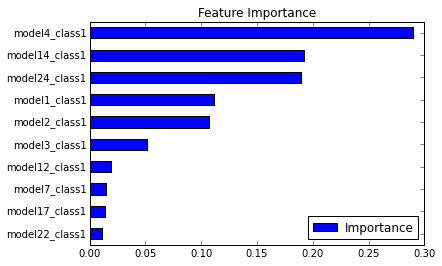

In [99]:
# we can take a look at the feature importance
%matplotlib inline
import matplotlib.pyplot as plt
rf=search2.best_estimator_
feature_names = list(prob2.columns)
importance = pd.DataFrame(rf.feature_importances_, index=feature_names, columns=['Importance'])
importance.sort('Importance', inplace=True)
importance.plot(kind='barh', title='Feature Importance')